In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.facecolor'] = 'lightgray'

In [2]:
payoff_matrix = {
    'Cooperate': {'Cooperate': (3, 3), 'Defect': (5, 1)},
    'Defect': {'Cooperate': (1, 5), 'Defect': (1, 1)}
}

df_game = pd.DataFrame(payoff_matrix)
df_game

,Cooperate,Defect
Cooperate,"(3, 3)","(1, 5)"
Defect,"(5, 1)","(1, 1)"


In [3]:
aleatorio = np.random.randint(0, 2, size=500).tolist()
#aleatorio = [1,1,0,1,0,1,1,0,0,1,1,1,0,1,0,0,0,0,1,0,0,1]

In [4]:
def pagos(df: pd.DataFrame, j1: list, j2: list):
    v1, v2 = [], []
    for i in range(len(j1)):
        if j1[i] == 0 and j2[i] == 0:
            v1.append(df.iloc[1, 1][0])
            v2.append(df.iloc[1, 1][1])

        elif j1[i] == 0 and j2[i] == 1:
            v1.append(df.iloc[1, 0][0])
            v2.append(df.iloc[1, 0][1])
        
        elif j1[i] == 1 and j2[i] == 0:
            v1.append(df.iloc[0, 1][0])
            v2.append(df.iloc[0, 1][1])
        
        elif j1[i] == 1 and j2[i] == 1:
            v1.append(df.iloc[0, 0][0])
            v2.append(df.iloc[0, 0][1])
    return v1, v2

In [5]:
class Players:
    def __init__(self, aleatorio:list):
        self.aleatorio = aleatorio

    def rick(self):
        j2 = [1]
        for i in range(len(self.aleatorio)):
            if i > 0 and self.aleatorio[i-1] == 0 and self.aleatorio[i] == 0:
                j2.extend([0] * (len(self.aleatorio) - i))
                break

            else:
                j2.append(1 if self.aleatorio[i] == 1 else 0)

        return j2[:len(self.aleatorio)]
    
    def friendman(self):
        j2 = [1]
        for i in range(len(self.aleatorio)):
            if i > 0 and self.aleatorio[i] == 0:
                j2.extend([0] * (len(self.aleatorio) - i))
                break

            else:
                j2.append(1 if self.aleatorio[i] == 1 else 0)

        return j2[:len(self.aleatorio)]
    
    def joss(self):
        j2 = [1] 
        for i in range(len(self.aleatorio)):  
            if (i + 1) % 10 == 0:
                j2.append(0)
            else:
                j2.append(1 if self.aleatorio[i] == 1 else 0)

        return j2[:len(self.aleatorio)]
    
    def graaskamp(self):
        j2 = [1] 
        for i in range(len(self.aleatorio)):  
            if (i + 1) % 20 == 0:
                j2.append(0)
            else:
                j2.append(1 if self.aleatorio[i] == 1 else 0)

        return j2[:len(self.aleatorio)]
    
    def tit_for_tat(self):
        j2 = [1]
        for i in range(len(self.aleatorio)):
            j2.append(1 if self.aleatorio[i] == 1 else 0)
        
        return j2[:len(self.aleatorio)]

In [6]:
rick = Players(aleatorio).rick()
friendman = Players(aleatorio).friendman()
joss = Players(aleatorio).joss()
graaskamp = Players(aleatorio).graaskamp()
tit_for_tat = Players(aleatorio).tit_for_tat()

players_strats = [rick, friendman, joss, graaskamp, tit_for_tat]
players_names = ['Rick', 'Friendman', 'Joss', 'Graaskamp', 'Tit for Tat']

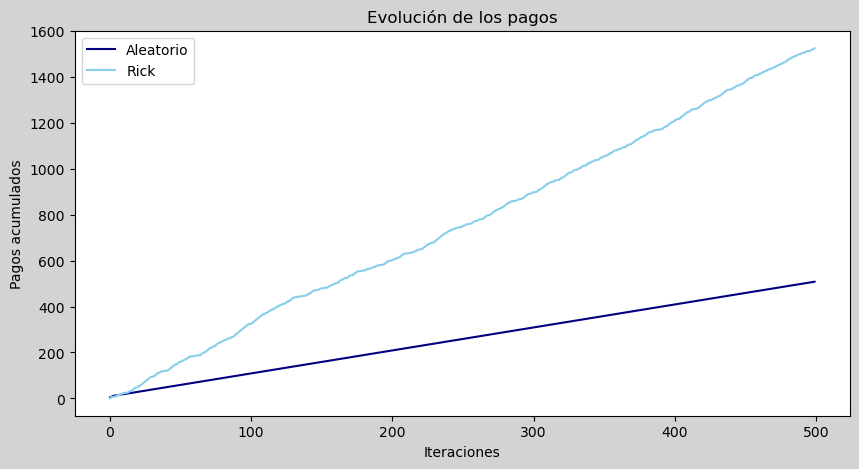

Pagos acumulados de Aleatorio: 508
Pagos acumulados de Rick: 1524


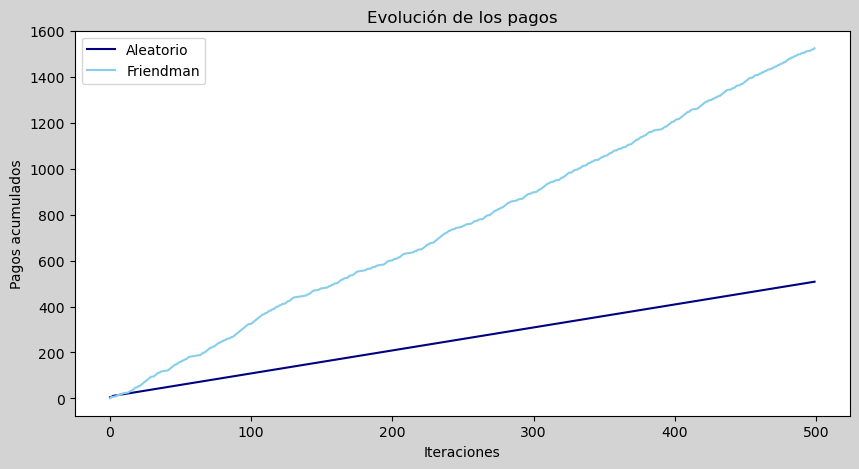

Pagos acumulados de Aleatorio: 508
Pagos acumulados de Friendman: 1524


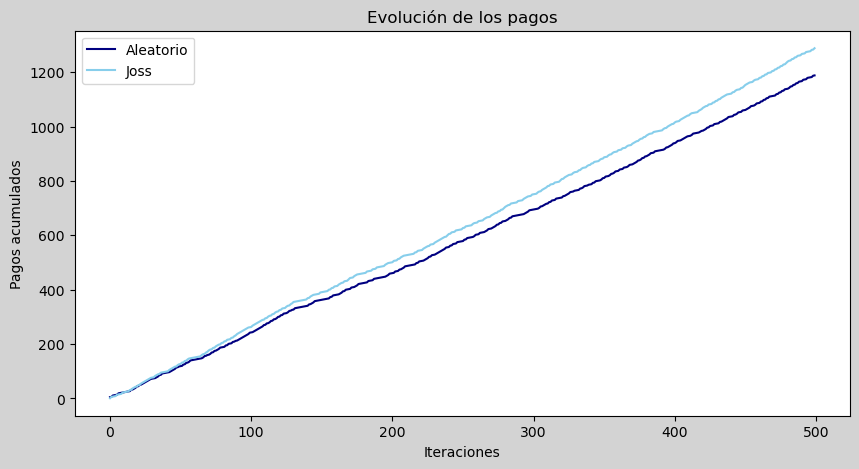

Pagos acumulados de Aleatorio: 1188
Pagos acumulados de Joss: 1288


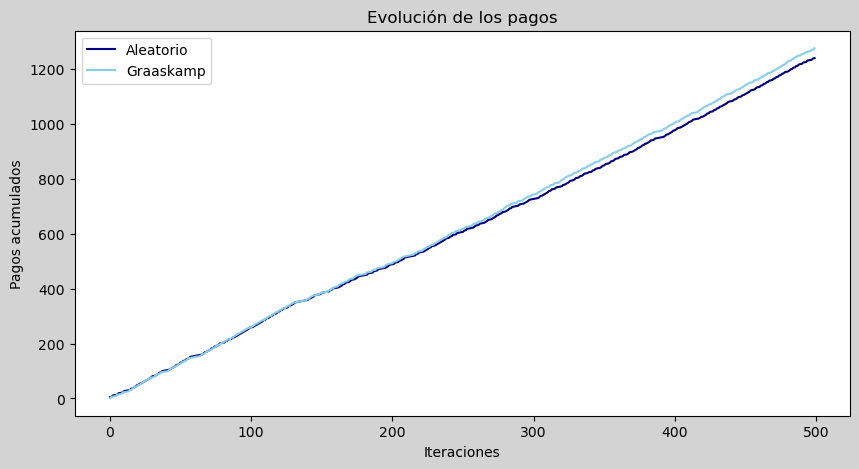

Pagos acumulados de Aleatorio: 1240
Pagos acumulados de Graaskamp: 1276


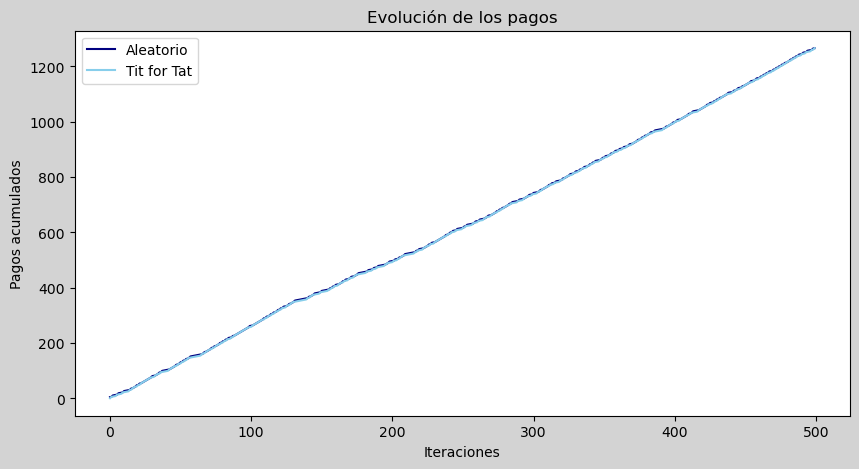

Pagos acumulados de Aleatorio: 1266
Pagos acumulados de Tit for Tat: 1266


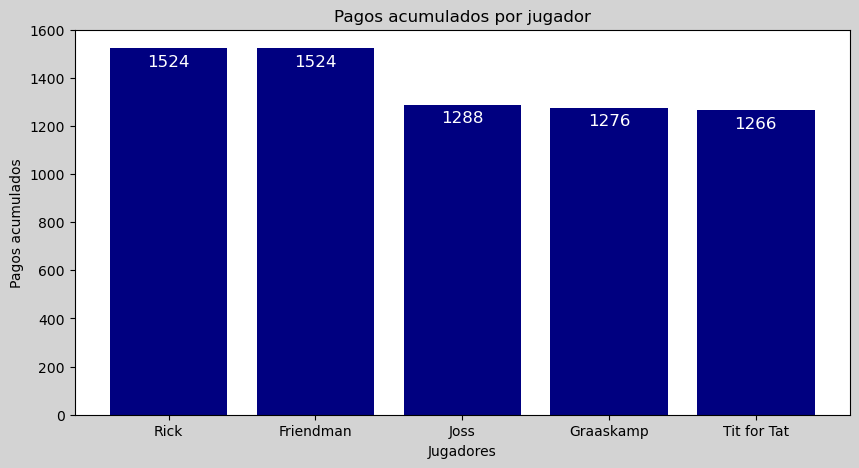

In [7]:
pagos_acumulados = []

for player, name in zip(players_strats, players_names):

    v1, v2 = pagos(df_game, aleatorio, player)

    pagos_acumulados.append(v2)

    plt.plot(np.cumsum(v1), label='Aleatorio', c = 'navy')
    plt.plot(np.cumsum(v2), label=f'{name}', c = 'skyblue')
    plt.legend()
    plt.title('Evolución de los pagos')
    plt.xlabel('Iteraciones')
    plt.ylabel('Pagos acumulados')
    plt.show()

    print(f'Pagos acumulados de Aleatorio: {np.cumsum(v1)[-1]}')
    print(f'Pagos acumulados de {name}: {np.cumsum(v2)[-1]}')

plt.bar(players_names, [np.sum(pagos) for pagos in pagos_acumulados], color='navy')
plt.title('Pagos acumulados por jugador')
plt.xlabel('Jugadores')
plt.ylabel('Pagos acumulados')
for i, total in enumerate([np.sum(pagos) for pagos in pagos_acumulados]):
    plt.text(i, total - 75, str(total), ha='center', fontsize=12, color="white")
plt.show()